In [440]:
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot
from scipy.stats import iqr
import seaborn as sns

In [441]:
def ends(df, n):
    """Show both head and tail of a pandas series or dataframe.
    
    Parameters
    -----------
    n: int
        # of rows to display in head and tail, respectively (i.e. the total
        # of rows displayed will be 2*n).
    """
    return pd.concat([df.head(n), df.tail(n)], axis=0)

In [442]:
def top_cats(df, col, cats=None, val=None):
    """Filter a df to only include the most common categories.
    
    Parameters
    -----------
    cats: int
        Optional - # of categories to include (i.e. top 5 most common
        categories).
    val: int
        Optional - Value count threshold to include (i.e. all categories that
        occur at least 10 times).
    """
    if cats is not None:
        top = df[col].value_counts(ascending=False).head(cats).index
        return df[df[col].isin(top)]
    if val is not None:
        return df.groupby(col).filter(lambda x: len(x) >= val)

In [443]:
iqr_ = partial(iqr, nan_policy='omit')

In [444]:
pd.DataFrame.ends = ends
pd.Series.ends = ends

In [445]:
stats = ['sapm', 'slpm', 'str_acc', 'str_def', 'td_acc', 'td_avg', 'td_def',
         'eff', 'active', 'grind', 'st_ratio']
attr = ['age', 'ape_ratio', 'reach']

In [420]:
df = pd.read_csv('data/final.csv', parse_dates=['dob'])
print(df.shape)
df.ends(3)

(2589, 49)


,d,l,nc,w,association,country,dob,fname,height1,height2,...,z_td_def,z_eff,z_active,z_grind,z_st_ratio,z_age,z_ape_ratio,fights,fstyle,z_reach
0,0,4,0.0,13,The Kennel Fight Club,USA,1989-09-22,Corey,75.0,75.0,...,1.272282,0.167906,0.081024,NaN,-0.457772,-1.288641,0.907691,17.0,grappler,1.167867
1,0,4,0.0,18,Jackson-Wink MMA,USA,1984-09-20,Quinn,75.0,75.0,...,-0.408081,-0.279619,-0.803921,NaN,-0.349774,-0.194782,-0.379793,22.0,balanced,1.874822
2,0,3,0.0,20,Wand Fight Team,USA,1969-10-31,Jason,66.0,66.0,...,-0.007771,-1.198965,-0.650687,NaN,-0.764141,3.390778,NaN,23.0,grappler,NaN
2586,0,4,0.0,7,NaN,NaN,1980-10-16,Rafael,65.0,NaN,...,0.783814,-0.447846,-0.371495,0.533514,-0.622730,1.167663,0.363415,11.0,grappler,-0.544786
2587,1,1,0.0,6,NaN,NaN,1990-06-11,Matt,69.0,NaN,...,1.187314,-0.021923,0.768572,-0.343374,-0.235104,-1.293224,0.184593,8.0,balanced,-0.199449
2588,0,8,3.0,20,NaN,NaN,1975-05-18,Ross,69.0,NaN,...,-1.461042,0.073004,-1.534257,NaN,-0.557066,1.598991,NaN,31.0,grappler,NaN


In [421]:
df.columns

Index(['d', 'l', 'nc', 'w', 'association', 'country', 'dob', 'fname',
       'height1', 'height2', 'lname', 'locality', 'name1', 'nick1', 'reach',
       'sapm', 'slpm', 'stance', 'str_acc', 'str_def', 'sub_avg', 'td_acc',
       'td_avg', 'td_def', 'weight1', 'eff', 'active', 'grind', 'ape_ratio',
       'st_ratio', 'age', 'wc', 'w_pct', 'z_sapm', 'z_slpm', 'z_str_acc',
       'z_str_def', 'z_td_acc', 'z_td_avg', 'z_td_def', 'z_eff', 'z_active',
       'z_grind', 'z_st_ratio', 'z_age', 'z_ape_ratio', 'fights', 'fstyle',
       'z_reach'],
      dtype='object')

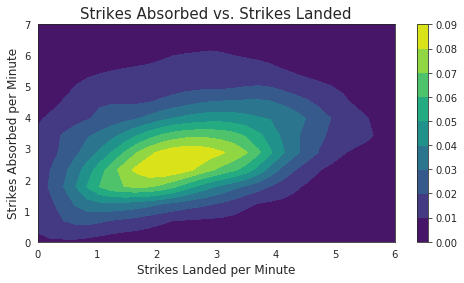

In [404]:
tmp = df[(df.sapm > 0) & (df.slpm > 0)]

fig, ax = plt.subplots(figsize=(8, 4))
sns.kdeplot(df.slpm, df.sapm, shade=True, ax=ax, cbar=True, cmap='viridis')
plt.xlim(0, 6)
plt.ylim(0, 7)
plt.xlabel('Strikes Landed per Minute', fontsize=12)
plt.ylabel('Strikes Absorbed per Minute', fontsize=12)
plt.title('Strikes Absorbed vs. Strikes Landed', fontsize=15)
plt.savefig('plots/kdeplot.png')
plt.show()

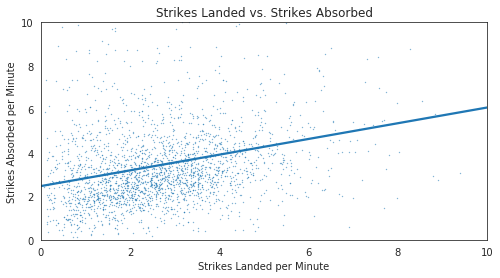

In [394]:
tmp = df[(df.sapm > 0) & (df.slpm > 0)]

fig, ax = plt.subplots(figsize=(8, 4))
sns.regplot(tmp.slpm, tmp.sapm, ax=ax, ci=None, scatter_kws=dict(s=.1))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Strikes Landed per Minute')
plt.ylabel('Strikes Absorbed per Minute')
plt.title('Strikes Landed vs. Strikes Absorbed')
plt.show()

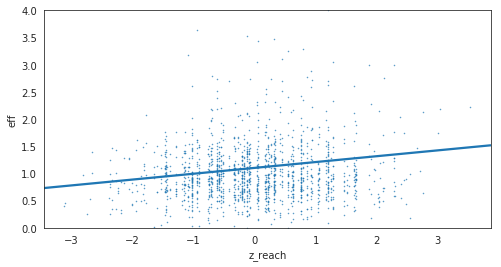

In [434]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.regplot(df.z_reach, df.eff, ax=ax, fit_reg=True, ci=False,
            scatter_kws=dict(s=.25))
plt.ylim(0, 4)
# plt.xlabel('Height (inches)')
# plt.ylabel('Reach (inches)')
# plt.title('Strikes Landed vs. Strikes Absorbed')
plt.show()

(50, 80)

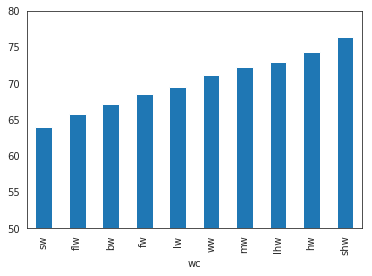

In [435]:
df.groupby('wc').height1.mean().sort_values().plot.bar()
plt.ylim(50, 80)

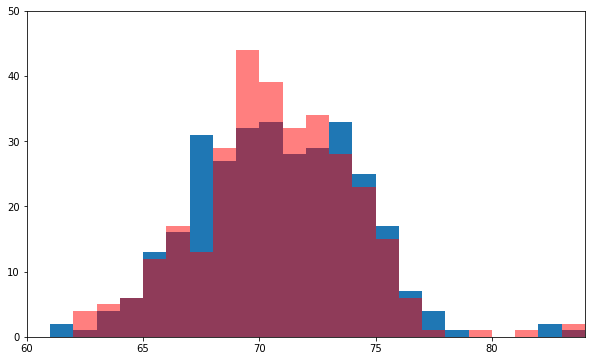

In [170]:
heights_notnull = df.loc[(df.height1.notnull()) & (df.height2.notnull()) & 
                         (df.height1 != df.height2)]

fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=True, sharey=True)
ax.hist(heights_notnull.height1, bins=range(60, 85, 1))
ax.hist(heights_notnull.height2, bins=range(60, 85, 1), color='red', alpha=.5)
plt.xlim(60, 84)
plt.ylim(0, 50)
plt.show()

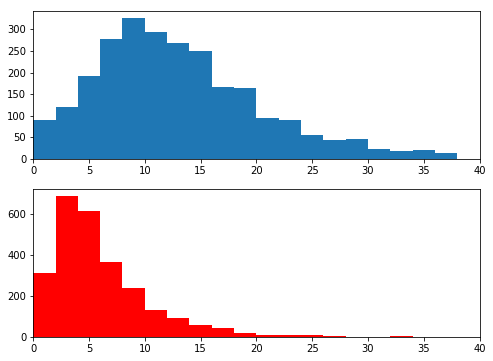

In [187]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].hist(df.w, bins=range(0, 40, 2))
ax[0].set_xlim(0, 40)
ax[1].hist(df.l, bins=range(0, 40, 2), color='red')
ax[1].set_xlim(0, 40)
plt.show()

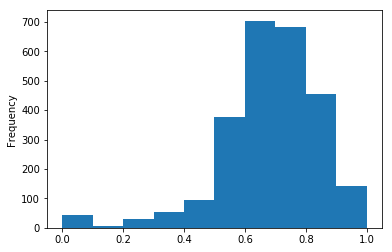

In [188]:
df.w_pct.plot.hist()

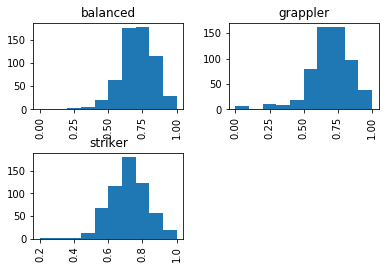

In [214]:
df.w_pct.hist(by=df['style'])
plt.show()

(array([0.00201613, 0.00705645, 0.03729839, 0.04334677, 0.05846774,
        0.08669355, 0.08770161, 0.07459677, 0.06754032, 0.02116935,
        0.01008065, 0.00403226]),
 array([60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84]),
 <a list of 12 Patch objects>)

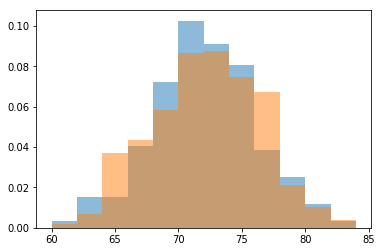

In [257]:
fix, ax = plt.subplots()
plt.hist(df.loc[df.fstyle == 'grappler', 'reach'], alpha=.5, density=True, bins=range(60, 85, 2))
plt.hist(df.loc[df.fstyle == 'striker', 'reach'], alpha=.5, density=True, bins=range(60, 85, 2))

In [265]:
df[df.age.notnull()].fstyle.value_counts()

striker     573
balanced    559
grappler    508
Name: fstyle, dtype: int64

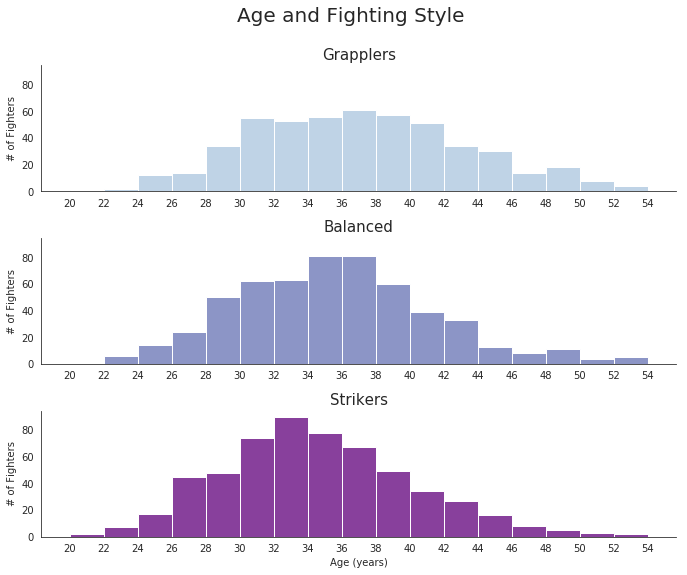

In [354]:
sns.set_style('white')
g = sns.FacetGrid(df, row='fstyle', hue='fstyle', height=2.7, aspect=3.5,
                  palette='BuPu', sharex=False)
g.map(plt.hist, 'age', bins=range(20, 56, 2))\
      .set_titles(size=15).set_axis_labels('Age (years)', '# of Fighters')\
      .fig.subplots_adjust(top=.88, hspace=.37)
for ax, cat in zip(g.axes.flatten(), ['Grapplers', 'Balanced', 'Strikers']):
    ax.set_title(cat, size=15)
    ax.set_xticks(range(20, 56, 2))
g.fig.suptitle('Age and Fighting Style', fontsize=20)
plt.savefig('plots/hist.png', bbox_inches='tight')
plt.show()

In [436]:
df.groupby('association').w_pct.mean()

association
011 MMA Team                      0.666667
10th Planet Jiu-Jitsu             0.562500
4oz. Fight Club                   0.560345
50                                0.875000
507 BJJ                           0.600000
808 Top Team                      0.611795
AKA Thailand                      0.675132
AKS Chorzow                       0.625000
AMA Fight Club                    0.723745
AMC Pankration                    0.785484
APAM                              0.750000
AVT Fight Team                    0.666667
Absolute Combat Alliance          0.809365
Academy of Combat Arts            0.802353
Adrenaline MMA                    0.583333
Adrenaline Training Center        0.716049
Aegis Athletics                   0.600000
Agallar Combative Systems         0.800000
Akimoto Dojo Jungle Junction      0.642857
Alberto Crane MMA                 0.750000
Alive                             0.710526
All American MMA                  0.583333
All In MMA                        0.680556

In [464]:
gb = df.groupby('association')[stats+attr].agg([len, np.mean, np.std, 
                                                np.median, iqr_])
gb.columns = ['_'.join(col) for col in gb.columns.values]
gb.drop([col for col in gb.columns if col.endswith('_len') 
         and col != 'sapm_len'], axis=1, inplace=True)
gb.rename(dict(sapm_len='num'), axis=1, inplace=True)
gb[gb.num >= 10]

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning:

All-NaN slice encountered



,num,sapm_mean,sapm_std,sapm_median,sapm_iqr,slpm_mean,slpm_std,slpm_median,slpm_iqr,str_acc_mean,...,age_median,age_iqr,ape_ratio_mean,ape_ratio_std,ape_ratio_median,ape_ratio_iqr,reach_mean,reach_std,reach_median,reach_iqr
association,,,,,,,,,,,,,,,,,,,,,
Alliance MMA,16.0,3.070625,0.974142,2.935,1.6175,2.986875,0.583720,2.950,0.8850,0.426250,...,35.583562,5.397260,1.030193,0.023982,1.029469,0.029975,72.642857,4.584374,72.0,6.5
American Kickboxing Academy,17.0,2.842353,1.380292,2.330,0.9200,3.300000,1.366538,3.120,1.7000,0.432941,...,39.095890,6.156164,1.025451,0.018538,1.027032,0.027422,73.187500,3.145764,72.0,5.5
American Top Team,52.0,3.301346,1.182470,3.125,1.3800,3.095769,1.461147,3.000,1.6850,0.407308,...,36.232877,6.917808,1.025345,0.028168,1.015385,0.036017,71.574468,4.004045,72.0,5.0
Blackzilians,18.0,2.962778,1.016741,2.705,0.9800,3.177222,0.965285,3.170,1.1250,0.458333,...,35.104110,4.172603,1.028668,0.025317,1.028169,0.039444,73.823529,2.877397,74.0,2.0
Grudge Training Center,13.0,3.257692,1.184899,3.040,1.4400,3.146154,1.304438,3.290,1.8900,0.420769,...,38.427397,3.950685,1.028632,0.032491,1.029412,0.048842,74.272727,4.027180,74.0,6.0
Jackson-Wink MMA,39.0,3.027436,1.010757,2.890,1.3150,2.975385,0.991240,3.100,1.0350,0.402308,...,36.810959,6.050685,1.025285,0.028288,1.026667,0.042555,72.057143,4.946436,73.0,8.0
MMA Lab,14.0,3.483571,1.418285,3.505,2.5550,3.222857,1.718445,2.980,1.1250,0.402857,...,33.510959,2.589041,1.016557,0.031730,1.014493,0.042857,70.846154,2.640901,71.0,3.0
Nova Uniao,18.0,3.293889,1.087469,3.190,1.5425,2.878889,1.424966,2.750,1.4200,0.413333,...,35.430137,6.044521,1.033511,0.024035,1.028169,0.031372,71.666667,3.903600,72.0,4.5
Renzo Gracie Jiu-Jitsu,10.0,2.673000,1.183536,2.385,1.6175,2.207000,0.700001,2.245,0.7750,0.434000,...,39.208219,7.009589,1.034318,0.025617,1.033889,0.034159,74.333333,3.881580,75.0,5.0


In [521]:
df.columns

Index(['d', 'l', 'nc', 'w', 'association', 'country', 'dob', 'fname',
       'height1', 'height2', 'lname', 'locality', 'name1', 'nick1', 'reach',
       'sapm', 'slpm', 'stance', 'str_acc', 'str_def', 'sub_avg', 'td_acc',
       'td_avg', 'td_def', 'weight1', 'eff', 'active', 'grind', 'ape_ratio',
       'st_ratio', 'age', 'wc', 'w_pct', 'z_sapm', 'z_slpm', 'z_str_acc',
       'z_str_def', 'z_td_acc', 'z_td_avg', 'z_td_def', 'z_eff', 'z_active',
       'z_grind', 'z_st_ratio', 'z_age', 'z_ape_ratio', 'fights', 'fstyle',
       'z_reach'],
      dtype='object')

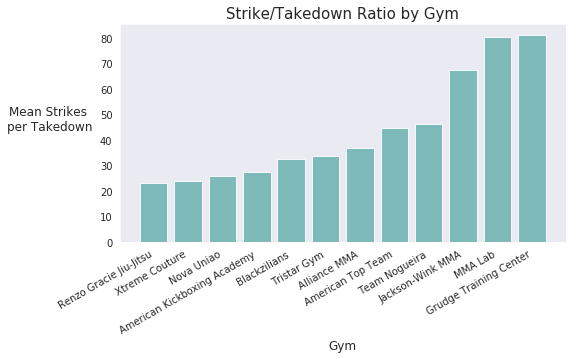

In [519]:
tmp = gb.sort_values('num', ascending=False)\
        .head(12)\
        .st_ratio_mean\
        .sort_values()

# sns.set_style('dark')
fig, ax = plt.subplots(figsize=(8, 4))
plt.bar(tmp.index, tmp, color='#6CB2B1', alpha=.85)
plt.xticks(range(12), rotation=30, ha='right')
plt.xlabel('Gym', fontsize=12)
plt.ylabel('Mean Strikes \nper Takedown', rotation=0, labelpad=50, 
           fontsize=12)
plt.title('Strike/Takedown Ratio by Gym', fontsize=15)
plt.savefig('plots/bar.png', bbox_inches='tight')
plt.show()

In [530]:
for col in df.corr():
    print(df.corr()[col].sort_values(ascending=False))
    print()

d              1.000000
fights         0.396829
l              0.349023
w              0.280448
z_age          0.237595
age            0.226914
nc             0.055500
td_acc         0.010614
z_td_acc       0.007260
z_sapm         0.004570
sub_avg       -0.009329
weight1       -0.011225
str_def       -0.013621
sapm          -0.018347
z_str_def     -0.019593
eff           -0.031576
grind         -0.039307
z_grind       -0.040800
str_acc       -0.042024
z_st_ratio    -0.042213
z_str_acc     -0.045789
st_ratio      -0.048290
height2       -0.050738
z_active      -0.052484
td_avg        -0.054585
z_eff         -0.054747
td_def        -0.056893
z_td_def      -0.059062
reach         -0.061642
z_td_avg      -0.061775
height1       -0.062095
active        -0.067755
ape_ratio     -0.080514
z_ape_ratio   -0.086452
z_slpm        -0.103716
slpm          -0.108691
z_reach       -0.113318
w_pct         -0.170046
Name: d, dtype: float64

l              1.000000
fights         0.825161
w              

td_avg         1.000000
z_td_avg       0.984164
td_acc         0.540247
z_td_acc       0.539427
z_grind        0.385450
grind          0.368431
z_eff          0.146505
sub_avg        0.132826
eff            0.114532
z_str_acc      0.113283
str_acc        0.112774
w_pct          0.100274
z_str_def      0.050447
str_def        0.049581
ape_ratio      0.034813
z_ape_ratio    0.028863
w              0.020341
td_def         0.009909
z_td_def       0.008470
nc            -0.000107
weight1       -0.011595
fights        -0.015927
height1       -0.015948
reach         -0.018991
z_age         -0.019654
age           -0.023970
slpm          -0.043119
z_slpm        -0.044603
height2       -0.045658
d             -0.054585
z_reach       -0.070181
l             -0.070374
z_active      -0.172242
active        -0.172469
sapm          -0.190240
z_sapm        -0.193787
st_ratio      -0.401394
z_st_ratio    -0.408856
Name: td_avg, dtype: float64

td_def         1.000000
z_td_def       0.990373
slpm      

z_td_acc       1.000000
td_acc         0.993850
z_td_avg       0.554679
td_avg         0.539427
z_eff          0.228363
z_grind        0.205939
z_str_def      0.194935
grind          0.194401
str_def        0.190572
z_td_def       0.176076
td_def         0.175512
eff            0.175045
str_acc        0.153922
z_str_acc      0.151330
w_pct          0.133658
w              0.129099
fights         0.103836
sub_avg        0.075600
slpm           0.072746
z_slpm         0.070435
ape_ratio      0.052676
z_ape_ratio    0.044022
nc             0.034996
reach          0.034406
l              0.034162
height1        0.016310
age            0.011850
height2        0.010499
d              0.007260
z_age          0.006892
weight1        0.002880
z_reach        0.001208
z_st_ratio    -0.109561
st_ratio      -0.112228
active        -0.157164
z_active      -0.157362
sapm          -0.242192
z_sapm        -0.249876
Name: z_td_acc, dtype: float64

z_td_avg       1.000000
td_avg         0.984164
z_td_acc

In [581]:
tmp = pd.pivot_table(df[df.stance.isin(['Orthodox', 'Southpaw'])], 
               index='wc', columns='stance', aggfunc=len)['active']

tmp = pd.pivot_table(df,
               index='fstyle', columns='wc', aggfunc=len)['active']
tmp

wc,bw,flw,fw,hw,lhw,lw,mw,shw,sw,ww
fstyle,,,,,,,,,,
balanced,58.0,36.0,64.0,53.0,56.0,105.0,75.0,2.0,19.0,117.0
grappler,55.0,24.0,65.0,51.0,59.0,112.0,92.0,9.0,7.0,109.0
striker,78.0,47.0,67.0,48.0,55.0,90.0,74.0,3.0,25.0,98.0


In [583]:
tmp / tmp.sum()

wc,bw,flw,fw,hw,lhw,lw,mw,shw,sw,ww
fstyle,,,,,,,,,,
balanced,0.303665,0.336449,0.326531,0.348684,0.329412,0.342020,0.311203,0.142857,0.372549,0.361111
grappler,0.287958,0.224299,0.331633,0.335526,0.347059,0.364821,0.381743,0.642857,0.137255,0.336420
striker,0.408377,0.439252,0.341837,0.315789,0.323529,0.293160,0.307054,0.214286,0.490196,0.302469


In [579]:
df.groupby(['fstyle', 'wc']).size()

fstyle    wc 
balanced  bw      58
          flw     36
          fw      64
          hw      53
          lhw     56
          lw     105
          mw      75
          shw      2
          sw      19
          ww     117
grappler  bw      55
          flw     24
          fw      65
          hw      51
          lhw     59
          lw     112
          mw      92
          shw      9
          sw       7
          ww     109
striker   bw      78
          flw     47
          fw      67
          hw      48
          lhw     55
          lw      90
          mw      74
          shw      3
          sw      25
          ww      98
dtype: int64

In [608]:
# 90th percentile and below, outliers won't show up on heatmap anyway.
tmp = pd.pivot_table(df[(df.w <= 23) & (df.l <= 11)], index='w', columns='l', 
                     aggfunc=len, fill_value=0)['active']

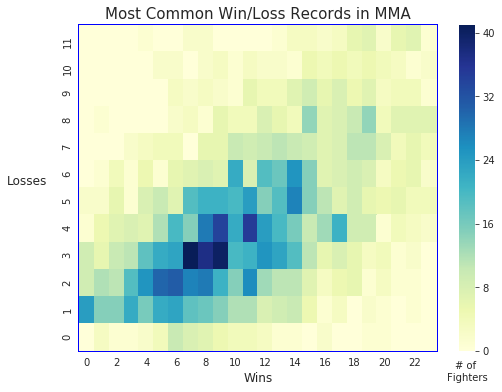

In [671]:
xticks = np.arange(0.5, 24, 2)
xlabels = range(0, 24, 2)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(tmp.T.sort_index(ascending=False), lw=0, cmap='YlGnBu', ax=ax)
ax.patch.set_linewidth(2)
ax.patch.set_edgecolor('blue')
ax.collections[0].colorbar.set_label('# of \nFighters', rotation=0, labelpad=-28, y=-.03)
plt.title('Most Common Win/Loss Records', fontsize=15)
plt.xticks(xticks, xlabels)
plt.xlabel('Wins', fontsize=12)
plt.ylabel('Losses', fontsize=12, rotation=0, labelpad=35)
plt.savefig('plots/heatmap.png', bbox_inches='tight')
plt.show()

In [645]:
df[(df.w == 0) & (df.l == 1)]

,d,l,nc,w,association,country,dob,fname,height1,height2,...,z_td_def,z_eff,z_active,z_grind,z_st_ratio,z_age,z_ape_ratio,fights,fstyle,z_reach
717,0,1,0.0,0,NaN,Canada,1975-08-18,Jason,70.0,72.0,...,-1.356888,-0.809121,3.756551,NaN,NaN,0.983076,NaN,1.0,NaN,NaN
1011,0,1,0.0,0,M-1 Global Training Center,USA,1968-08-24,James,69.0,70.0,...,-1.125355,-0.707406,-0.873570,NaN,NaN,1.474511,NaN,1.0,NaN,NaN
1302,0,1,0.0,0,NaN,NaN,NaT,Michael,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1346,0,1,0.0,0,NaN,NaN,1986-04-20,Errol,75.0,NaN,...,-1.356888,NaN,-0.873931,NaN,NaN,-0.707115,NaN,1.0,NaN,NaN
1349,0,1,0.0,0,NaN,NaN,NaT,Scott,67.0,NaN,...,0.622853,4.773319,-1.060834,-0.827582,NaN,NaN,NaN,1.0,NaN,NaN
1437,0,1,0.0,0,NaN,NaN,1972-03-05,Lloyd,73.0,NaN,...,-1.125355,-0.707406,-0.741048,NaN,NaN,0.980125,NaN,1.0,NaN,NaN
1475,0,1,0.0,0,NaN,NaN,NaT,Raou,68.0,NaN,...,-1.154993,-0.188922,0.601983,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1479,0,1,0.0,0,NaN,NaN,NaT,Mack,NaN,NaN,...,-1.154993,-0.251848,0.104812,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1524,0,1,0.0,0,NaN,NaN,1968-09-28,Francois,74.0,NaN,...,-1.125355,-0.707406,-1.173952,NaN,NaN,1.461087,NaN,1.0,NaN,NaN
1568,0,1,0.0,0,NaN,NaN,1983-05-18,Kazuhisa,66.0,NaN,...,-1.138172,-0.474914,-1.508576,NaN,NaN,0.511784,NaN,1.0,NaN,NaN
